You need to write a function that takes as input an image key and filters that need to be applied to it (**crop, blur, resize, pixelate, optimize, and others**) and returns a new image + saves it to the cache so that it can be processed faster next time.

статьи про кэширование в python (есть lru_cache декоратор из functools)
https://proglib.io/p/keshirovanie-v-python-algoritm-lru-2020-11-17

**blur**

In [2]:
#Import required Image library
from PIL import Image, ImageFilter

#Open existing image
OriImage = Image.open('photo_2020-12-18_15-12-32.jpg')
OriImage.show()

blurImage = OriImage.filter(ImageFilter.BLUR)
blurImage.show()
#Save blurImage
blurImage.save('photo_2020-12-18_15-12-32.jpg')

**crop**

In [3]:
# добавить проверку на размер, чтобы не выходил за границы изображения?

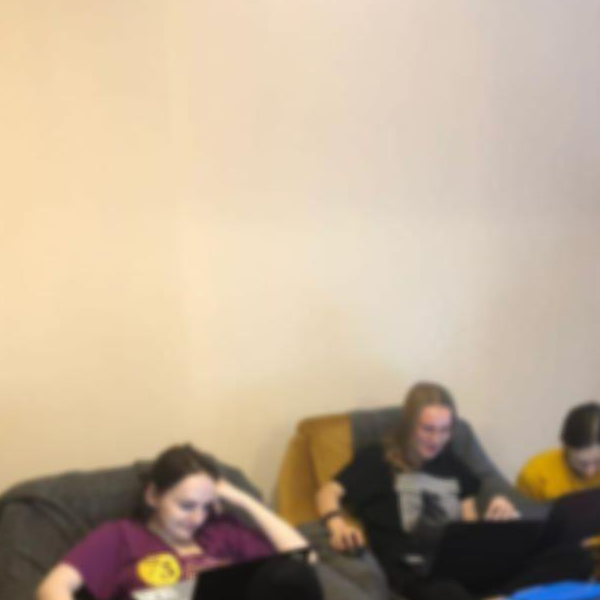

In [32]:
from PIL import Image
img = Image.open("photo_2020-12-18_15-12-32.jpg")
area = (100, 100, 700, 700)
# left, up, right, bottom
(width, height) = img.size
sample_width = abs(area[0] - area[2])
sample_height = abs(area[1] - area[3])

if sample_width > width:
    print('Change the width <=', width)
elif sample_height > height:
    print('Change the height <=', height)
else:
    cropped_img = img.crop(area)
    display(cropped_img)
    


**pixelate**

In [5]:
# будет всё переводить в ргб?
# почему сохраняет 4 картинки
# почему чем больше число, тем меньше пикселей?

In [6]:
def pixelate(image, pixel_size=9, draw_margin=True):
    margin_color = (0, 0, 0)

    image = image.resize((image.size[0] // pixel_size, image.size[1] // pixel_size), Image.NEAREST)
    image = image.resize((image.size[0] * pixel_size, image.size[1] * pixel_size), Image.NEAREST)
    pixel = image.load()

    # Draw black margin between pixels
    if draw_margin:
        for i in range(0, image.size[0], pixel_size):
            for j in range(0, image.size[1], pixel_size):
                for r in range(pixel_size):
                    pixel[i+r, j] = margin_color
                    pixel[i, j+r] = margin_color

    return image

In [7]:
image = Image.open("photo_2020-12-18_15-12-32.jpg").convert('RGB')

image_pixelate = pixelate(image)
image_pixelate.save('output.jpg')

for size in (16, 32, 48):
    image_pixelate = pixelate(image, pixel_size=size)
    image_pixelate.save('output_{}.jpg'.format(size))

**optimize**

In [8]:
# не оч понятно, что именно делает функция (сохраняет размазанного по ширине вьетамца...)

In [9]:
from PIL import Image
from datetime import datetime

# timestamp = datetime.now().timestamp()

# path = 'public/build/screenshots'
# img = f'{path}/screenshot.png'
im = Image.open("photo_2020-12-18_15-12-32.jpg")
# im = Image.open(img)
im = im.convert("RGB")
im = im.resize((1200, 750), Image.ANTIALIAS)
im.save("81.jpg", optimize=True, quality=75)


**resize**

In [10]:
# можно по идее добавить ввод размера от пользователя

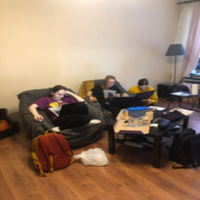

In [11]:
from PIL import Image
 
# Меняем размер изображения на новый.
tatras = Image.open('photo_2020-12-18_15-12-32.jpg')
tatras = tatras.resize((200, 200), Image.ANTIALIAS)

display(tatras)

**допы** - вроде у Маши были более удобные, эти просто для примера

оттенки серого, сепия, негатив, добавление шумов, яркость, чб

In [12]:
import random
from PIL import Image, ImageDraw #Подключим необходимые библиотеки. 

mode = int(input('mode:')) #Считываем номер преобразования. 
image = Image.open("photo_2020-12-18_15-12-32.jpg") #Открываем изображение. 
draw = ImageDraw.Draw(image) #Создаем инструмент для рисования. 
width = image.size[0] #Определяем ширину. 
height = image.size[1] #Определяем высоту. 	
pix = image.load() #Выгружаем значения пикселей.

mode:2


In [18]:
import random
from PIL import Image, ImageDraw  

mode = int(input('mode:'))  
image = Image.open("photo_2020-12-18_15-12-32.jpg")  
draw = ImageDraw.Draw(image)  
width = image.size[0]  
height = image.size[1]  	
pix = image.load() 
if (mode == 0): #оттенки серого
	for i in range(width):
		for j in range(height):
			a = pix[i, j][0]
			b = pix[i, j][1]
			c = pix[i, j][2]
			S = (a + b + c) // 3
			draw.point((i, j), (S, S, S))
if (mode == 1): #сепия
	depth = int(input('depth:'))
	for i in range(width):
		for j in range(height):
			a = pix[i, j][0]
			b = pix[i, j][1]
			c = pix[i, j][2]
			S = (a + b + c) // 3
			a = S + depth * 2
			b = S + depth
			c = S
			if (a > 255):
				a = 255
			if (b > 255):
				b = 255
			if (c > 255):
				c = 255
			draw.point((i, j), (a, b, c))
if (mode == 2): #негатив
	for i in range(width):
		for j in range(height):
			a = pix[i, j][0]
			b = pix[i, j][1]
			c = pix[i, j][2]
			draw.point((i, j), (255 - a, 255 - b, 255 - c))
if (mode == 3): #шумы
	factor = int(input('factor:'))
	for i in range(width):
		for j in range(height):
			rand = random.randint(-factor, factor)
			a = pix[i, j][0] + rand
			b = pix[i, j][1] + rand
			c = pix[i, j][2] + rand
			if (a < 0):
				a = 0
			if (b < 0):
				b = 0
			if (c < 0):
				c = 0
			if (a > 255):
				a = 255
			if (b > 255):
				b = 255
			if (c > 255):
				c = 255
			draw.point((i, j), (a, b, c))
if (mode == 4): #яркость
	factor = int(input('factor:'))
	for i in range(width):
		for j in range(height):
			a = pix[i, j][0] + factor
			b = pix[i, j][1] + factor
			c = pix[i, j][2] + factor
			if (a < 0):
				a = 0
			if (b < 0):
				b = 0
			if (c < 0):
				c = 0
			if (a > 255):
				a = 255
			if (b > 255):
				b = 255
			if (c > 255):
				c = 255
			draw.point((i, j), (a, b, c))
if (mode == 5): #чб
	factor = int(input('factor:'))
	for i in range(width):
		for j in range(height):
			a = pix[i, j][0]
			b = pix[i, j][1]
			c = pix[i, j][2]
			S = a + b + c
			if (S > (((255 + factor) // 2) * 3)):
				a, b, c = 255, 255, 255
			else:
				a, b, c = 0, 0, 0
			draw.point((i, j), (a, b, c))
image.save("ans.jpg", "JPEG")
del draw

mode:0
